## Intro 
 

### Import libraries and load data

In [2]:
#libraries import
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# for tensorboard logs
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, KFold
from functions import *
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE, SMOTEN

np.random.seed(111)
tf.random.set_seed(111)


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Fish_neural_network_classifier/refs/heads/main/H2O_based/Data/H2O_KEGG_paths_merged.csv')


In [8]:
print(df.shape)
df.head()

(235, 74)


,KEGG,S8.127.H2O,S8.128.H2O,S8.126.H2O,S9.173.H2O,S9.172.H2O,S9.171.H2O,S10.158.H2O,S10.156.H2O,S10.157.H2O,...,S29.140.H2O,S30.165.H2O,S30.166.H2O,S30.167.H2O,S31.200.H2O,S31.199.H2O,S31.198.H2O,S32.168.H2O,S32.170.H2O,S32.169.H2O
0,ko05340,7796.58,7358.46,6073.50,3717.56,9672.35,7708.30,5327.16,5761.41,6595.54,...,6027.67,16221.75,10541.91,5627.02,10333.67,10545.02,9665.00,15331.25,10540.90,7770.66
1,ko00564,89529.66,91213.27,64366.77,34228.73,111143.13,105175.45,60121.19,67015.74,84352.80,...,58051.33,117317.50,128035.50,53039.49,98918.84,126686.86,105618.25,165634.77,117651.60,93997.45
2,ko00680,160055.28,158115.18,108494.35,58283.03,192784.75,166035.90,94181.10,104655.61,139964.63,...,98132.31,208511.25,204727.17,96751.87,169239.87,218371.56,161252.00,263903.60,201917.23,165505.66
3,ko00562,25823.92,26196.54,17731.16,10041.02,32941.22,27540.97,16930.17,19831.57,21186.65,...,16834.69,41698.25,31694.65,19436.88,28720.52,33603.55,27302.00,43110.91,37517.52,25616.75
4,ko03030,110647.68,109971.20,80175.45,40347.45,133548.94,129398.40,80332.70,77521.42,105370.61,...,70012.32,173717.50,156296.99,68403.88,115791.14,157080.38,125769.25,225542.95,138788.61,113686.27


In [18]:
ID = df['pond'].str.split('.').apply(lambda x: x[1] if len(x) > 1 else None)
df.insert(1, 'ID', ID)

In [20]:
df.sort_values('ID', inplace=True)

In [ ]:
predictors = df.columns[2:]
print(f"number of predictors/bacteria famillies: {len(predictors)}")

# replacing NaN values with 0
df.fillna(0, inplace=True)

df.head()



number of predictors/bacteria famillies: 237


,pond,ID,ko05340,ko00564,ko00680,ko00562,ko00563,ko03030,ko00561,ko00440,...,ko05412,ko00905,ko03015,ko05414,ko04320,ko04740,ko05214,ko04745,ko04012,ko04722
0,S8.201.Sed,201,2483.06,46002.51,73354.01,12921.62,55.0,52097.75,23289.22,2725.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S8.202.Sed,202,3736.83,57196.57,102558.53,16078.17,0.0,67388.46,31995.86,3786.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,S14.203.Sed,203,1981.65,34767.88,53110.90,10947.29,0.0,39051.04,18265.41,2046.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,S14.204.Sed,204,2449.32,48040.43,84004.08,12796.85,0.0,56249.04,25634.66,2413.32,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
21,S18.205.Sed,205,3223.75,58863.78,92218.54,16609.16,20.0,65939.93,29358.10,3393.33,...,10.0,0.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# for normalisation we will use starndard min-max normalisation
df[predictors] = normalize(df[predictors], norm='max', axis=0, copy=True, return_norm=False)
df.describe()

,ko05340,ko00564,ko00680,ko00562,ko00563,ko03030,ko00561,ko00440,ko00250,ko00740,...,ko05412,ko00905,ko03015,ko05414,ko04320,ko04740,ko05214,ko04745,ko04012,ko04722
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.427981,0.489505,0.498134,0.559149,0.030909,0.506057,0.540151,0.490196,0.531252,0.522307,...,0.065455,0.081739,0.055135,0.080000,0.065455,0.027500,0.027500,0.027500,0.027500,0.027500
std,0.204134,0.197568,0.194754,0.217259,0.151018,0.196681,0.212624,0.228835,0.203750,0.209122,...,0.236663,0.212934,0.169793,0.254194,0.236663,0.150021,0.150021,0.150021,0.150021,0.150021
min,0.052225,0.052410,0.052397,0.061102,0.000000,0.050122,0.055485,0.063806,0.052093,0.059861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.298748,0.355653,0.384165,0.421461,0.000000,0.390621,0.408219,0.311749,0.414260,0.394164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.390221,0.476028,0.500701,0.541827,0.000000,0.484009,0.519813,0.482618,0.515067,0.497278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.505913,0.616061,0.618313,0.697781,0.000000,0.624554,0.679154,0.630388,0.661848,0.649361,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




| number | setup | pond numbers | water supplementation | feed supplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [24]:
df['pond_org'] = df['pond']

C:\Users\marek\AppData\Local\Temp\ipykernel_19752\3039816547.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_org'] = df['pond']


In [25]:
# Decoding use pond decoder 2 for this

codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}

df['pond']=df['pond_org'].apply(lambda x: pond_decoder_2(x, codes))


In [27]:
df['pond'].value_counts()

pond
0    10
1    10
2    10
3    10
4    10
Name: count, dtype: int64

In [28]:
timepoint = np.tile([0, 1], 25)
df.insert(1, 'timepoint', timepoint)

C:\Users\marek\AppData\Local\Temp\ipykernel_19752\1971028199.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(1, 'timepoint', timepoint)


In [29]:
df.head()

,pond,timepoint,ID,ko05340,ko00564,ko00680,ko00562,ko00563,ko03030,ko00561,...,ko00905,ko03015,ko05414,ko04320,ko04740,ko05214,ko04745,ko04012,ko04722,pond_org
0,0,0,201,0.480291,0.616735,0.600233,0.695639,1.000000,0.613798,0.653411,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,S8.201.Sed
1,0,1,202,0.722804,0.766809,0.839204,0.865572,0.000000,0.793949,0.897688,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,S8.202.Sed
12,0,0,203,0.383305,0.466118,0.434590,0.589350,0.000000,0.460086,0.512461,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,S14.203.Sed
13,0,1,204,0.473765,0.644057,0.687379,0.688922,0.000000,0.662708,0.719216,...,0.0,0.00000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,S14.204.Sed
21,0,0,205,0.623560,0.789161,0.754595,0.894158,0.363636,0.776882,0.823682,...,0.0,0.27027,0.833333,0.909091,0.0,0.0,0.0,0.0,0.0,S18.205.Sed


In [30]:
# defragmenting 
df = df.copy()

In [13]:
#train_val_df, test_df = train_test_split(df, test_size= 10, random_state=111, stratify=df['pondXtime'])
#print(train_val_df.shape, test_df.shape)

### Definitions

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)


In [15]:
# early stopping callback to save the best model weights for test set
es_callback = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=100,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

### Modelling without oversampling
We will start with made most sense form biological perspective: by using as controll all observations from tp 0 plus controll from tp 1


In [16]:
model1 = keras.Sequential()



model1.add(keras.layers.Dense(128,input_shape=(len(predictors),),activation='relu'))


model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(64, activation ='relu'))
model1.add(keras.layers.Dense(16, activation ='relu'))
model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(16, activation ='relu'))

model1.add(keras.layers.Dense(5, activation ='softmax'))

print(model1.summary())


loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        30,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,117 (156.71 KB)

 Trainable params: 40,117 (156.71 KB)

 Non-trainable params: 0 (0.00 B)

None


Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6000 - loss: 1.7898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0]
true validation classes: [0 0 1 4 0 1 0 0 4 0]
mean confidence score: 61.006, sd confidence score: 107.3874
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 1.8597
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [0 0 2 0 0 0 0 0 0 0]
true validation classes: [3 0 1 3 4 1 0 0 0 0]
mean confidence score: 14.2864, sd confidence score: 13.0322
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 1.8051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 0]
true validation classes: [2 0 0 0 3 0 2 0 1 2]
mean confidence score: 30.1511, sd confidence score: 36.3952
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4000 - loss: 1.2947
1/1 ━━━━━━━━━━━━━━━━━━━

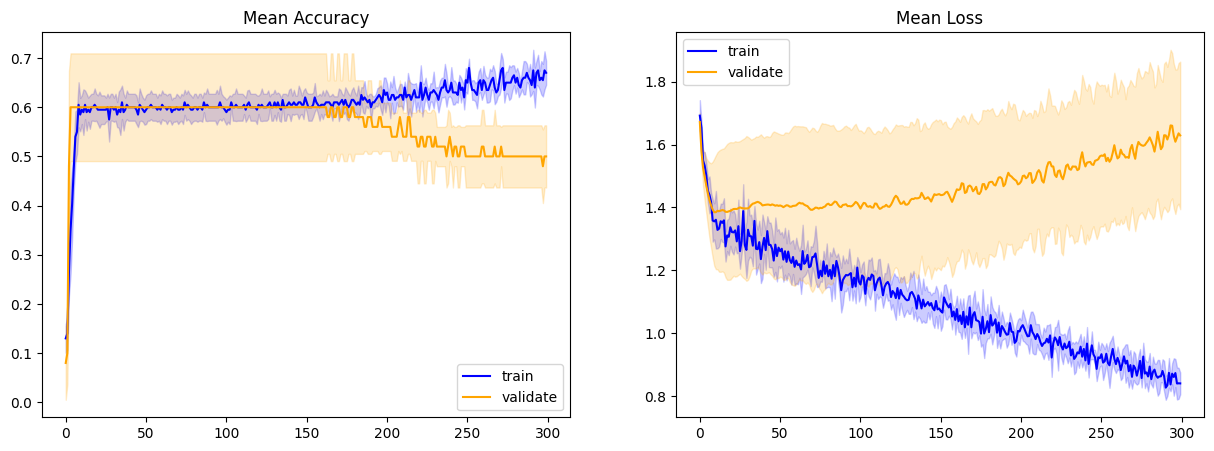

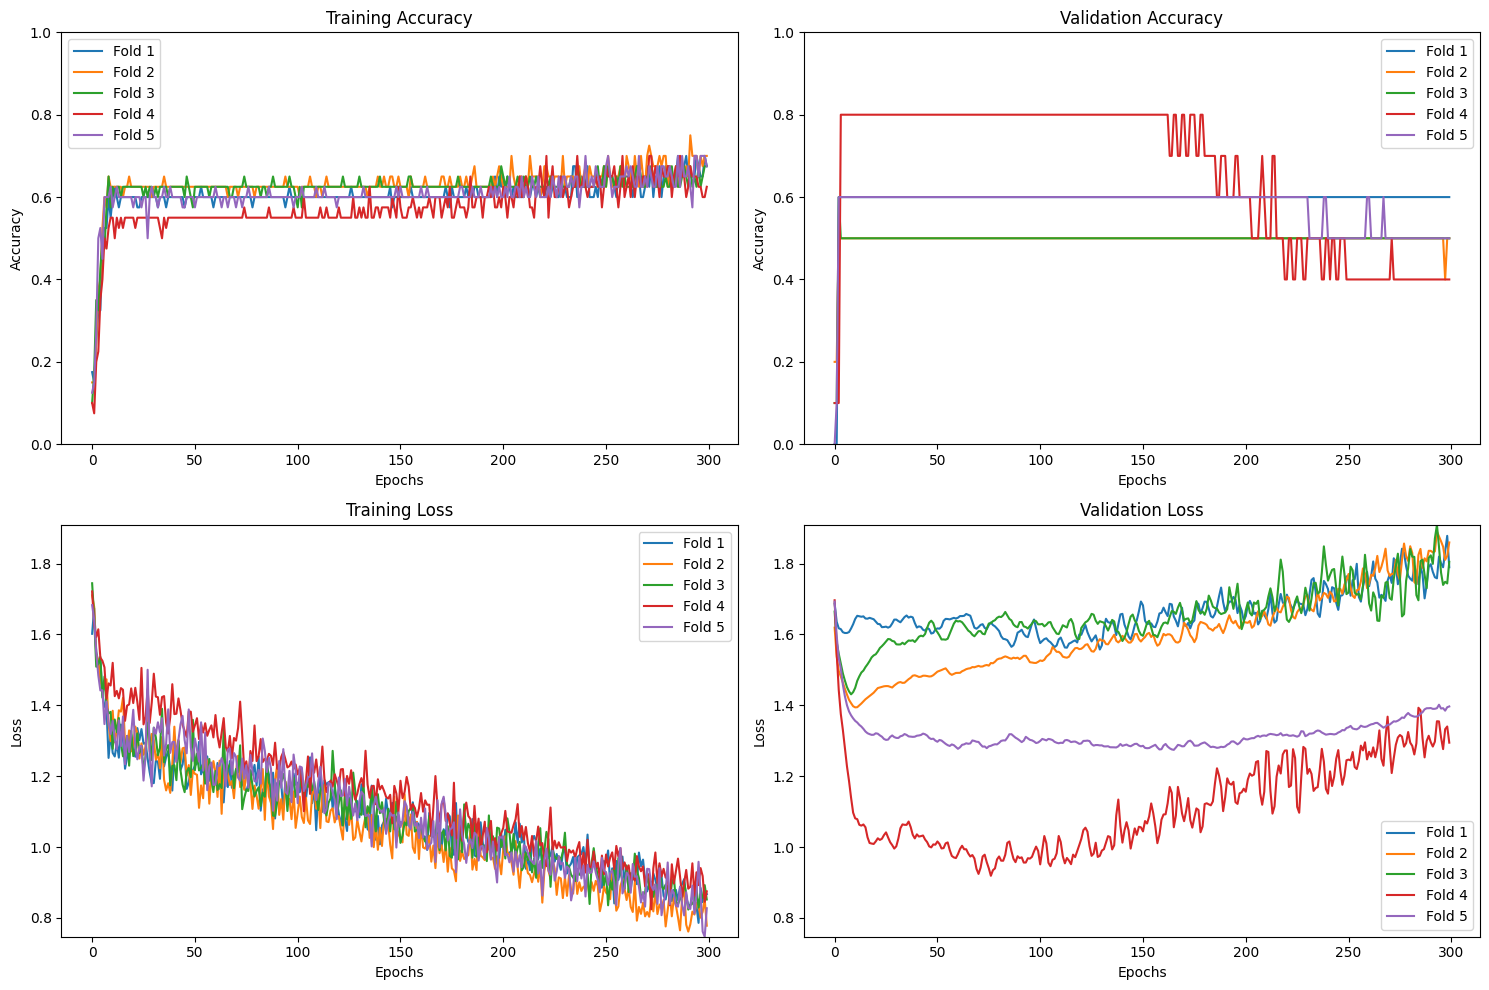

In [17]:
crossvalidate(df, model1, predictors, 'class', kf)

We can see the results are the same as for bacteria dataset, with problems caused by overrepresentation.

### Oversampling 1:4 classes
For oversampling we will again use SMOTE algorythm as it is more sophisticated than just duplicating.

In [18]:
train_val_df, test_df = train_test_split(df, test_size= 10, random_state=111, stratify=df['class'])
train_val_df.shape, test_df.shape

((40, 241), (10, 241))

In [19]:
smote = SMOTE(random_state=111, sampling_strategy='not majority', k_neighbors=3)
X = train_val_df[predictors].values
y = train_val_df['class']

 

In [20]:
# Ensure y contains discrete class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_smote, y_smote = smote.fit_resample(X, y_encoded)

In [21]:
print(X.shape, y.shape)
print(X_smote.shape, y_smote.shape)

(40, 237) (40,)
(120, 237) (120,)


In [22]:
df_smote = pd.concat([pd.DataFrame(X_smote, columns=predictors), pd.DataFrame(y_smote, columns=['class'])], axis=1)
df_smote['class'].value_counts()

class
0    24
4    24
3    24
1    24
2    24
Name: count, dtype: int64

#### Modeling oversampled dataset

In [23]:
model2 = keras.Sequential()



model2.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))


model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Dense(64, activation ='sigmoid'))
model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Dense(16, activation ='sigmoid'))

model2.add(keras.layers.Dense(5, activation ='softmax'))

model2.summary()

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │        60,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,501 (306.64 KB)

 Trainable params: 78,501 (306.64 KB)

 Non-trainable params: 0 (0.00 B)

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7917 - loss: 0.8434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
predicted classes:       [0 4 3 1 1 1 2 2 0 1 3 1 1 2 3 3 3 3 3 3 3 4 4 4]
true validation classes: [0 4 3 1 1 0 0 0 0 0 0 1 1 2 3 3 3 3 3 3 3 4 4 4]
mean confidence score: 4.4515, sd confidence score: 2.5976
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.7974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [0 2 3 1 0 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 4]
true validation classes: [0 2 0 3 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 4]
mean confidence score: 3.4966, sd confidence score: 2.8428
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.8821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [2 3 2 2 1 1 1 1 2 2 2 2 3 3 3 3 3 2 4 4 4 2 2 4]
true validation classes: [0 3 0 2 0 1 1 1 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4]
mean confidence

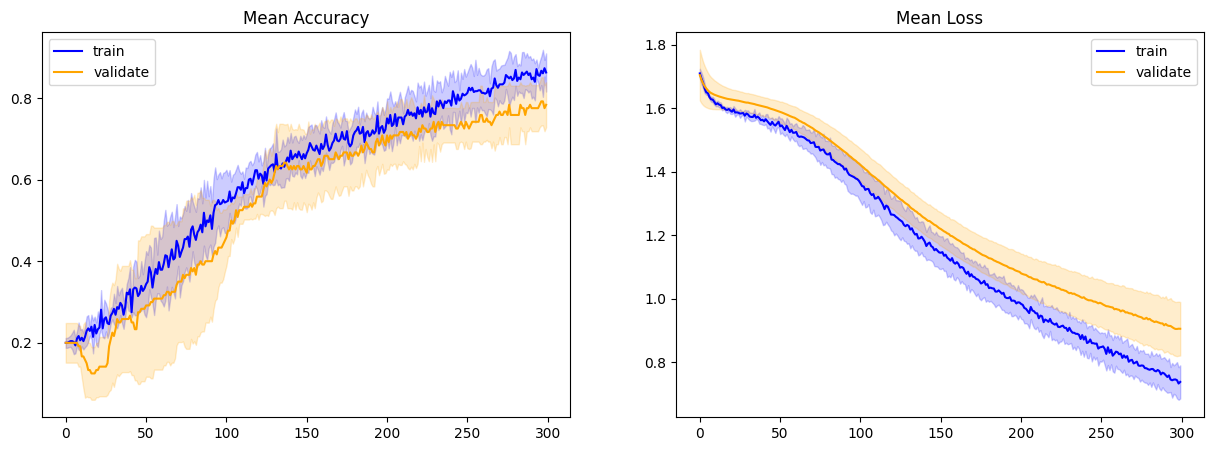

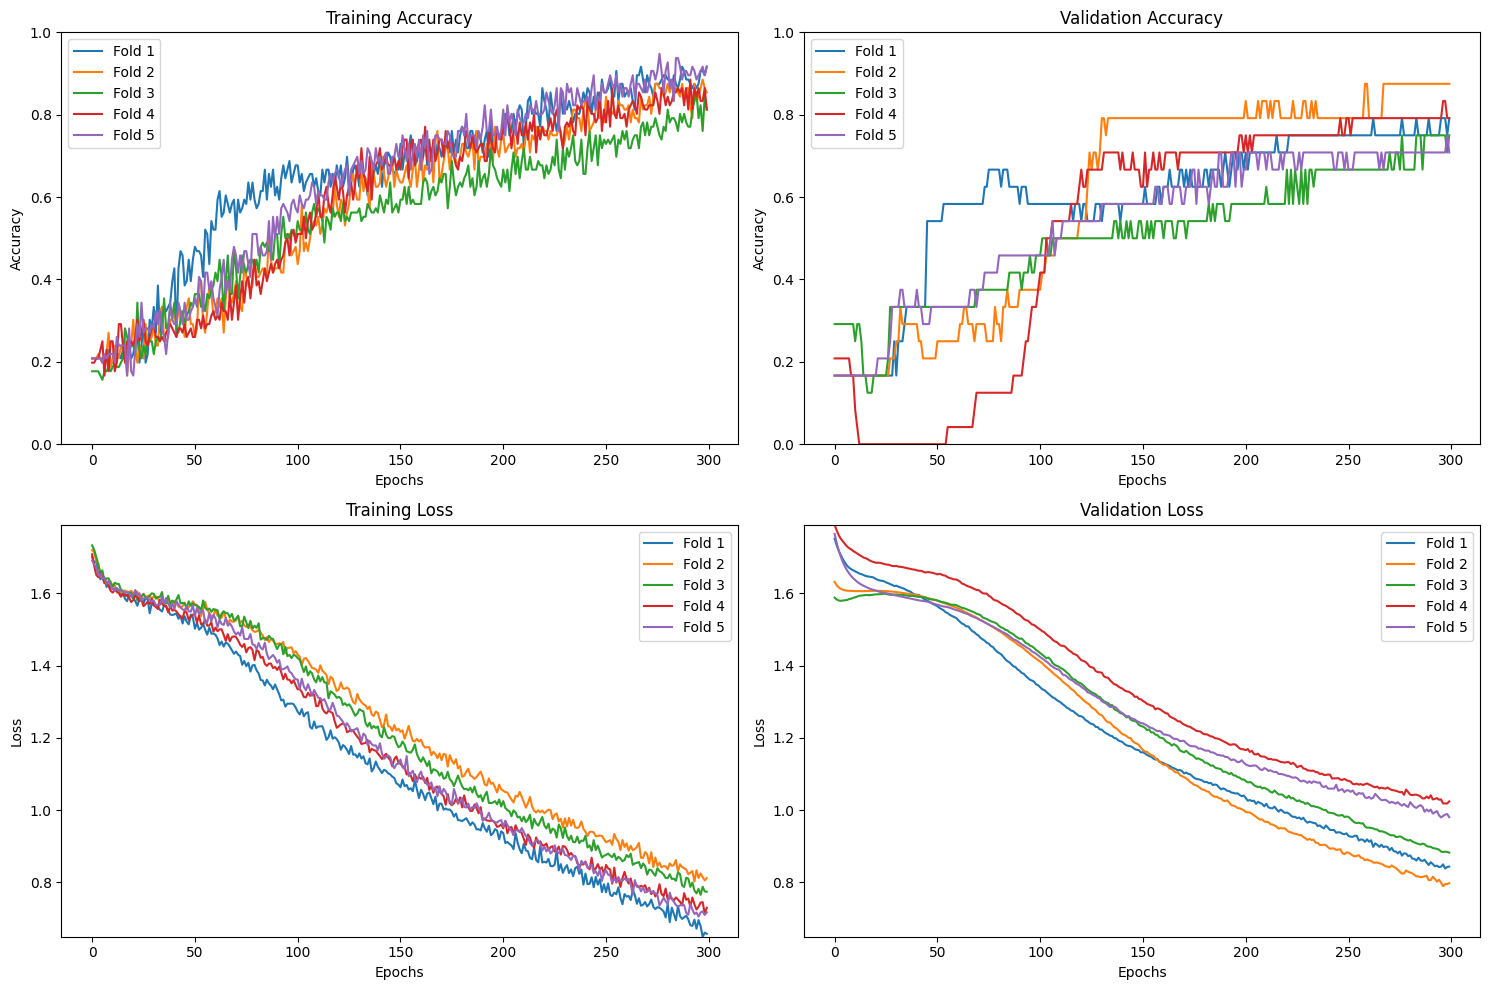

In [24]:
crossvalidate(df_smote, model2, predictors, 'class', kf)

As in bacteria dataset this approach is better than withour oversampling but we have to cosnider same problems as before, in addition accuracy is worse than for bacteria dataset, we will check resutls for test dataset now.

In [25]:
reset_weights(model2)
X_train_val = df_smote[predictors].values
y_train_val = keras.utils.to_categorical(df_smote['class'].values)
X_test = test_df[predictors].values
y_test = keras.utils.to_categorical(test_df['class'].values)
X_train_val.shape, y_train_val.shape, X_test.shape, y_test.shape


((120, 237), (120, 5), (10, 237), (10, 5))

In [26]:
history2 = model2.fit(X_train_val, y_train_val, validation_data = (X_test, y_test), epochs=500, callbacks=[es_callback], verbose=1)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1998 - loss: 1.7490 - val_accuracy: 0.1000 - val_loss: 2.1257
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1998 - loss: 1.7399 - val_accuracy: 0.1000 - val_loss: 2.1151
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1998 - loss: 1.7448 - val_accuracy: 0.1000 - val_loss: 2.1040
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1998 - loss: 1.7276 - val_accuracy: 0.1000 - val_loss: 2.0931
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1998 - loss: 1.7181 - val_accuracy: 0.1000 - val_loss: 2.0816
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1998 - loss: 1.7225 - val_accuracy: 0.1000 - val_loss: 2.0694
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1998 - loss: 1.7048 - val_accuracy: 0.1000 - val_loss: 2.0570
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2146 - loss: 1.7202 - val_accuracy: 0.1000 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1000 - loss: 1.6592
[1.6592187881469727, 0.10000000149011612]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted values: [4 4 1 4 4 4 3 1 0 4]
True values: [1 0 4 0 2 0 0 0 0 3]


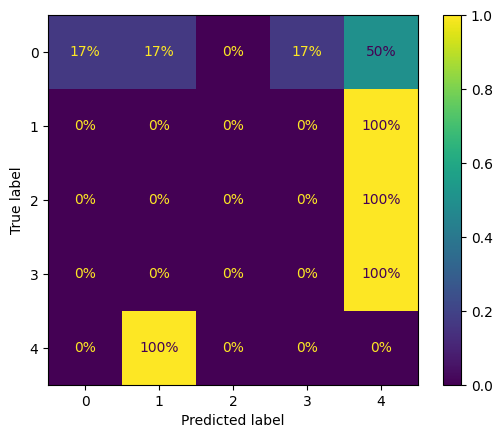

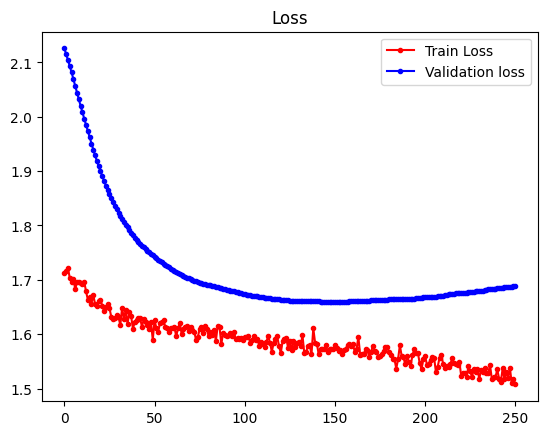

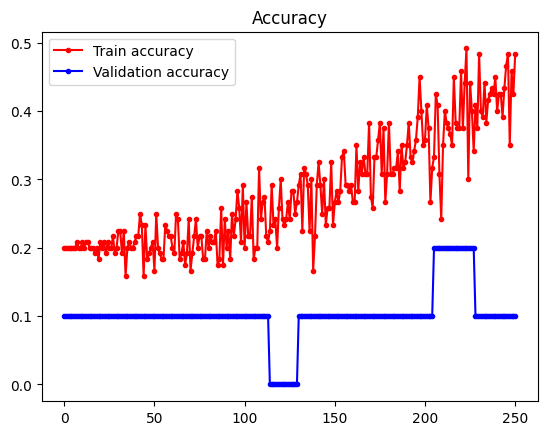

In [27]:
evaluate_model(model2,history2,test_df[predictors] , keras.utils.to_categorical(test_df['class']))

Here unfortunetelly we can see that model didnt learn anything and jsut predicted everything to class 0, the issue of overrepresentation was not present here, so the possible solution is that its much harder to make this kind of prediction based on KEGG dataset than on bacteria dataset. We will now move to best approach from previous analisis:

### Oversampling all of the classes in 5 class classification for both timepoints


In [28]:
train_val_df.shape, test_df.shape

((40, 241), (10, 241))

In [29]:
empty_class = pd.DataFrame(0, index=range(40),columns=train_val_df.columns)
#empty_class[] = np.random.rand(40, empty_class.shape[1])
empty_class['pond'] = 9


In [30]:
train_val_df_empty_class = pd.concat([train_val_df, empty_class], axis=0)

In [31]:
smote = SMOTE(random_state=111)
X = train_val_df_empty_class[predictors].values
y = train_val_df_empty_class['pond']

In [32]:
X.shape, y.shape

((80, 237), (80,))

In [33]:
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.shape

(240,)

In [34]:
df_smote = pd.concat([pd.DataFrame(X_smote, columns=predictors), pd.DataFrame(y_smote, columns=['pond'])], axis=1)
df_smote_cleared = df_smote[df_smote['pond'] != 9]
df_smote_cleared.reset_index(drop=True, inplace=True)
print(df_smote_cleared.shape)
df_smote_cleared['pond'].value_counts()

(200, 238)


pond
1    40
0    40
4    40
3    40
2    40
Name: count, dtype: int64

(80, 237) (80,)
(240, 237) (240,)
Number of classes: 5
training for 1 subset


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.5489  
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000018EA927A5C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted classes:       [1 0 3 2 4 1 1 0 3 0 0 0 0 0 0 0 1 1 1 1 1 3 2 2 2 2 2 2 1 3 3 1 3 4 4 4 4
 4 4 4]
true validation c

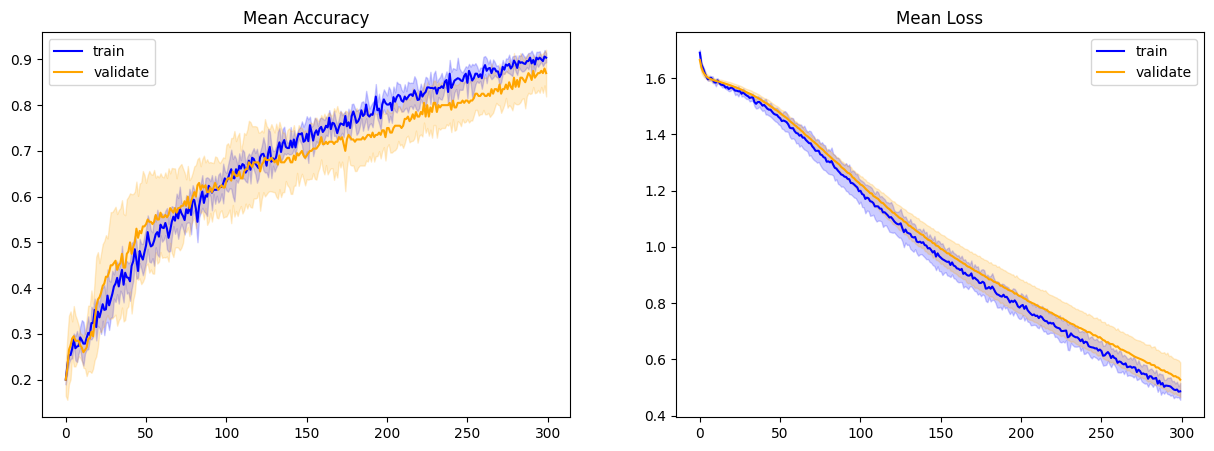

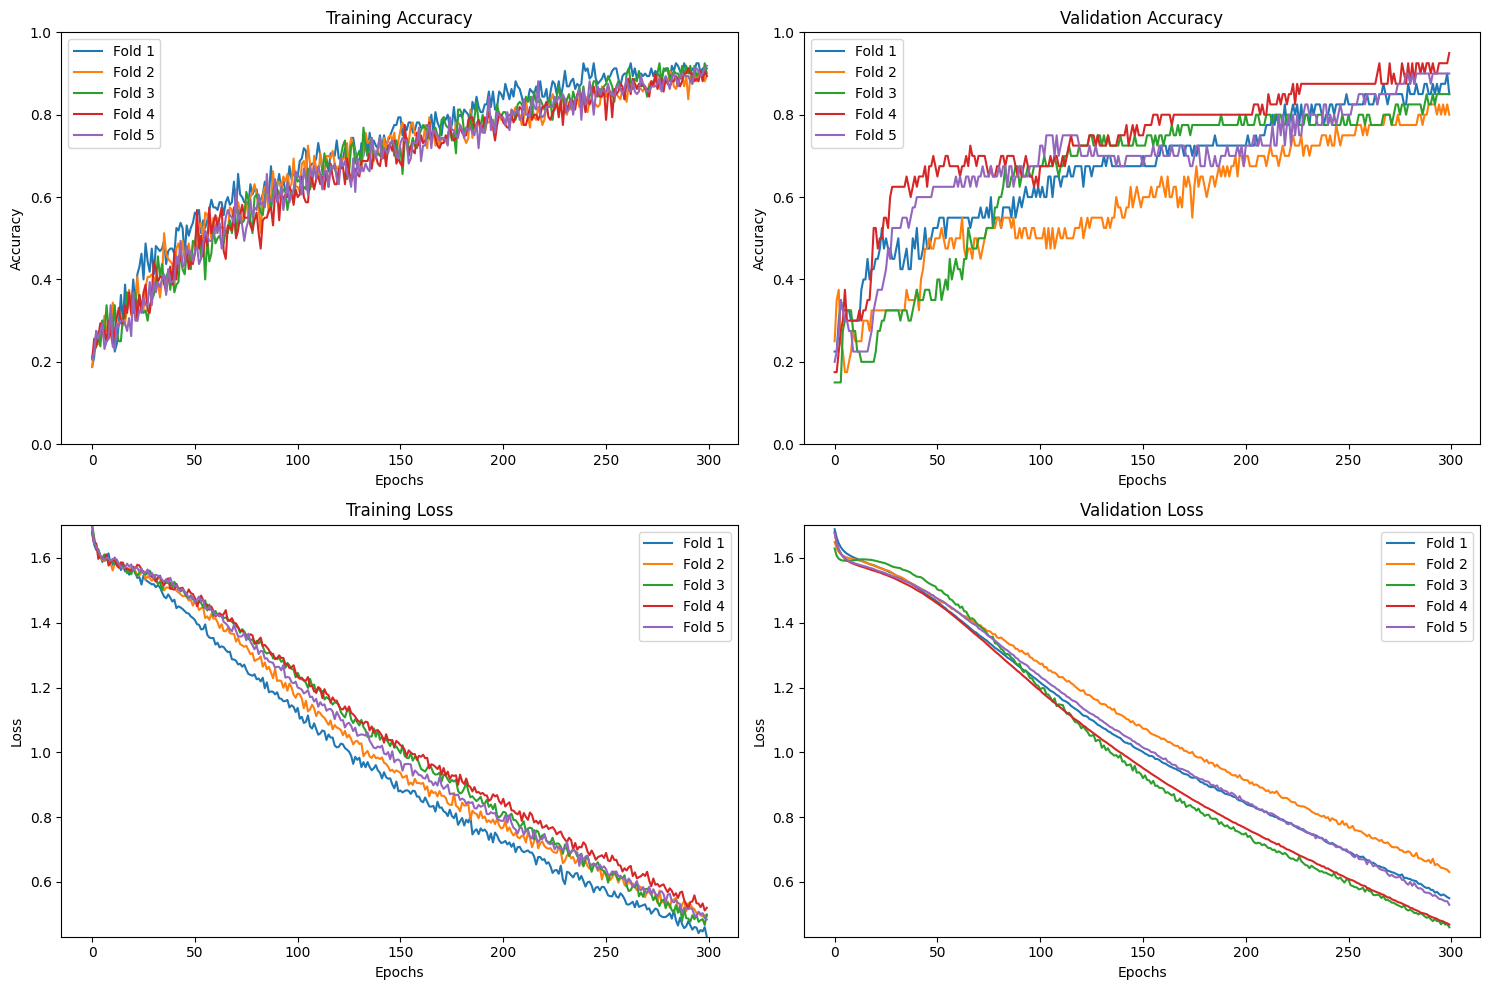

In [35]:
print(X.shape, y.shape)
print(X_smote.shape, y_smote.shape)

model3 = keras.Sequential()
model3.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(16, activation ='sigmoid'))
model3.add(keras.layers.Dense(5, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3.compile(optimizer = optimizer, loss = loss, metrics=metrics)
crossvalidate(df_smote_cleared, model3, predictors, 'pond', kf)

In [36]:
X = df_smote_cleared[predictors].values
y = keras.utils.to_categorical(df_smote_cleared['pond'].values)
y_test = keras.utils.to_categorical(test_df['pond'].values)
X_test = test_df[predictors].values
reset_weights(model3)   

history5 = model3.fit(X, y, epochs=300, batch_size=5,validation_data=(X_test, y_test), verbose=1, callbacks=[es_callback])

Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2202 - loss: 1.6701 - val_accuracy: 0.2000 - val_loss: 1.5821
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2170 - loss: 1.6378 - val_accuracy: 0.2000 - val_loss: 1.5770
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2859 - loss: 1.6029 - val_accuracy: 0.1000 - val_loss: 1.5812
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3072 - loss: 1.5956 - val_accuracy: 0.2000 - val_loss: 1.5877
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.6034 - val_accuracy: 0.3000 - val_loss: 1.5943
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 1.5831 - val_accuracy: 0.3000 - val_loss: 1.6008
Epoch 7/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3451 - loss: 1.5778 - val_accuracy: 0.3000 - val_loss: 1.6069
Epoch 8/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2666 - loss: 1.5905 - val_accuracy: 0.3000 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2000 - loss: 1.5770
[1.5769814252853394, 0.20000000298023224]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted values: [1 1 1 2 2 1 1 1 2 1]
True values: [1 2 4 0 2 0 0 2 1 3]


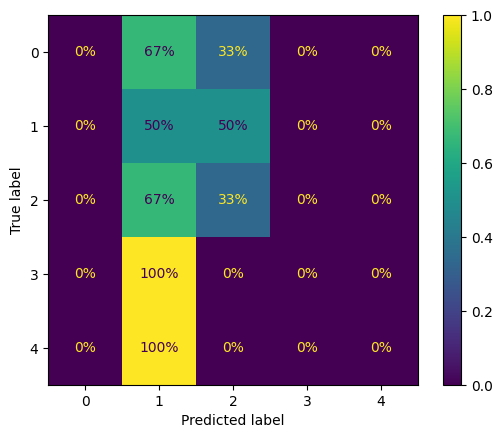

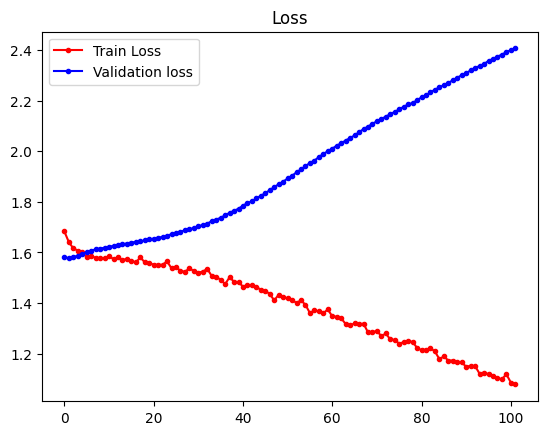

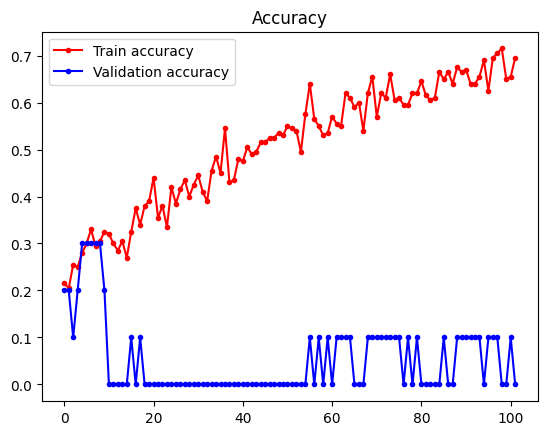

In [37]:
evaluate_model(model3, history5, X_test, y_test)

We can see simillar issues to previous classification approach, model is behaving much worse than for batcteria dataset. So if we are using same architecture results for KEGG paths dataset are much worse in comparison to bacteria dataset. Again issue of small number of original samples is probably causing most of the problems but we can see that model is having much harder time with KEGG dataset.